<a href="https://colab.research.google.com/github/kiran9615/Linear_regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <u> Task </u>
### Build a Linear Regression model to predict the profit made by a startup on the basis of expenses incurred and the state where they operate




##**Linear Regression**



In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [3]:
# loading the dataset
file_path=pd.read_csv('/content/drive/MyDrive/Datascience/Datasets/50_Startups.csv')
startup_df=pd.DataFrame(file_path)

In [4]:
# checking for the shape of dataset
startup_df.shape

(50, 5)

In [5]:
# checking for 1st few rows of dataset
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Profit is a dependent variable and all other features are acting as an independent variable.

## **Basic Data preprocessing and Exploratory Data Analysis**

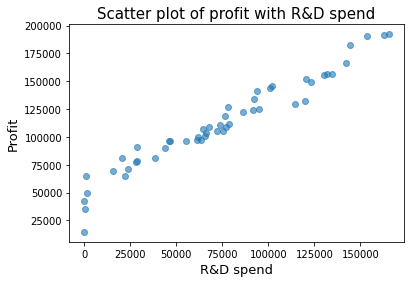

In [6]:
# checking for how profit is related to R & D spend
plt.scatter(startup_df['R&D Spend'],startup_df['Profit'],alpha=0.6)   #scatter plot
plt.title('Scatter plot of profit with R&D spend',fontsize=15)   #to give title
plt.xlabel('R&D spend',fontsize=13)   #to give x-axis label
plt.ylabel('Profit',fontsize=13)   #to give y-axis label
plt.show()

we can see there is almost a linear relationship between these two variables.

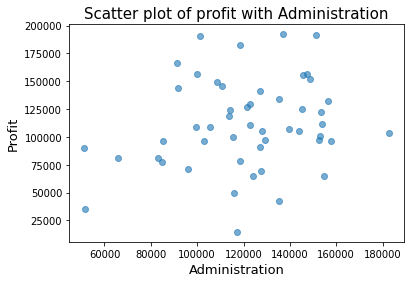

In [7]:
# checking for how profit is related to Administration
plt.scatter(startup_df['Administration'],startup_df['Profit'],alpha=0.6)
plt.title('Scatter plot of profit with Administration',fontsize=15)
plt.xlabel('Administration',fontsize=13)
plt.ylabel('Profit',fontsize=13)
plt.show()

we can see there is no linear relation between these two, we can later on drop this variable.

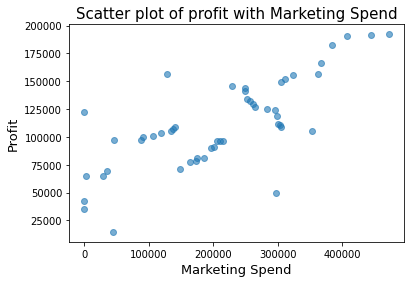

In [8]:
# checking for how profit is related to Marketing Spend
plt.scatter(startup_df['Marketing Spend'],startup_df['Profit'],alpha=0.6)
plt.title('Scatter plot of profit with Marketing Spend',fontsize=15)
plt.xlabel('Marketing Spend',fontsize=13)
plt.ylabel('Profit',fontsize=13)
plt.show()

somewhere linear relation between these two variables

In [9]:
# checking for different categories of States variable
startup_df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [10]:
startup_df.groupby('State')['Profit'].mean()  #average profit state wise

State
California    103905.175294
Florida       118774.024375
New York      113756.446471
Name: Profit, dtype: float64

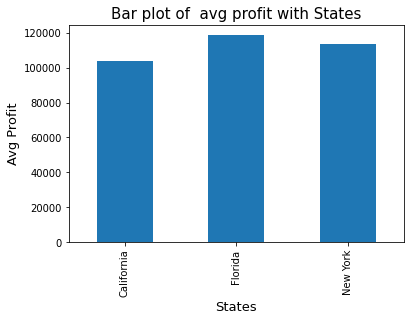

In [11]:
# checking for average profit for these states
startup_df.groupby('State')['Profit'].mean().plot.bar()   #bar plot
plt.title('Bar plot of  avg profit with States',fontsize=15)
plt.xlabel('States',fontsize=13)
plt.ylabel('Avg Profit',fontsize=13)
plt.show()

we can see Florida has max avg profit and California has minimum, the possible reasons for this could be:

1. High living standard of california due to which profit is not that much instead of revenue being high.
2. Since data is very small, it could be biased.
3. Presence of outlier could be one reason but here this is not the case , we have checked for it using median.


In [12]:
# creating dummy variables for categorical variable
startup_df['NewYork_state']=np.where(startup_df['State']=='New York',1,0)
startup_df['Florida_state']=np.where(startup_df['State']=='Florida',1,0)
startup_df['California_state']=np.where(startup_df['State']=='California',1,0)
startup_df.drop(columns=['State','Administration'],axis=1,inplace=True)   #dropping column state

In [13]:
startup_df.head()

,R&D Spend,Marketing Spend,Profit,NewYork_state,Florida_state,California_state
0,165349.20,471784.10,192261.83,1,0,0
1,162597.70,443898.53,191792.06,0,0,1
2,153441.51,407934.54,191050.39,0,1,0
3,144372.41,383199.62,182901.99,1,0,0
4,142107.34,366168.42,166187.94,0,1,0


In [14]:
# defining dependent and independent variables
dependent_variable='Profit'

independent_variable=list(set(startup_df.columns)-{dependent_variable})

In [15]:
independent_variable

['California_state',
 'Florida_state',
 'R&D Spend',
 'Marketing Spend',
 'NewYork_state']

In [16]:
x=startup_df[independent_variable]

In [17]:
y=startup_df[dependent_variable]

In [18]:
x.values[0:5]

array([[0.0000000e+00, 0.0000000e+00, 1.6534920e+05, 4.7178410e+05,
        1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.6259770e+05, 4.4389853e+05,
        0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.5344151e+05, 4.0793454e+05,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.4437241e+05, 3.8319962e+05,
        1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.4210734e+05, 3.6616842e+05,
        0.0000000e+00]])

In [19]:
# splitting the data into train and test data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [20]:
# scaling of x values and y values
scalar=MinMaxScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [21]:
x_train[0:5]

array([[1.        , 0.        , 0.38348453, 0.09768292, 0.        ],
       [1.        , 0.        , 0.23319442, 0.3709309 , 0.        ],
       [0.        , 0.        , 0.47408436, 0.63532724, 1.        ],
       [0.        , 1.        , 0.17335288, 0.42631115, 0.        ],
       [0.        , 0.        , 0.52264964, 0.        , 1.        ]])



## **Model building**

In [22]:
# Linear Regression Model
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [23]:
# checking for intercept term
regressor.intercept_

48671.01253855099

In [24]:
# checking for parameters of the model
regressor.coef_

array([-2.51658133e+02,  2.96654931e+02,  1.27531569e+05,  1.41408705e+04,
       -4.49967979e+01])

In [25]:
# predicting dependent variable values across x_train
y_train_pred=regressor.predict(x_train)
y_train_pred[0:5]

array([ 98707.05952289,  83404.28980913, 118070.81840319,  77104.0428827 ,
       115280.34440779])

In [26]:
# predicting dependent variable values across x_test
y_pred=regressor.predict(x_test)
y_pred[0:5]

array([114827.6605231 ,  90276.01543828,  75776.41051654,  69781.80536337,
       179542.09445188])

In [27]:
# checking for rmse of training data
math.sqrt(mean_squared_error(y_train,y_train_pred))

8949.19571897966

In [28]:
# checking for rmse for testing data
math.sqrt(mean_squared_error(y_test,y_pred))

8973.80856726151

Since rmse in both of the cases above is almost equal, so we can say our model is stable

In [29]:
# checking for performance of the model
r2_score(y_train,y_train_pred)   #r2 score for train data

0.9424108004299571

In [30]:
r2_score(y_test,y_pred)   #r2 score for test data

0.9645061498880405

r square has good value, so we can say our model is accurate